# Taylors teorem

Det finnes et uendelig mangfold av funksjoner der ute! For å gjøre det litt mer håndterlig, er det ofte nyttig å bruke bedre kjente funksjoner som en tilnærming.

Den aller viktigste slik tilnærminger bruker Taylors teorem, som handler om approksimasjon med polynomer.

1. Funksjoner av en variabel
2. Funksjoner av en variabel II: restledd
3. Funksjoner av flere variabler $\mathbb{R}^n\rightarrow\mathbb{R}$


**Læringsmål**

- Forstår funksjonstilnærming av 1d funksjoner med Taylors teorem 
- Forstår middelverdisetning og uttrykk for restledd 
- Bruk restleddet til å estimere feilen ved Taylortilnærming 
- Undersøk (med datamaskin) hva slags problemer kan oppstå med slike tilnærminger 
- Utfør linearisering av skalare funksjoner av to variabler 
- Utfør andre ordens Taylortilnærminger av funksjoner av to variabler, og koble mot kritisk punkter og den andre deriverte 

Vi skal altså finne tilnærminger

$$
f(x) \approx P_k(x),
$$

hvor $P_k(x)$ er et polynom av orden $k$, dvs. $P_k(x) = a_k x^k + a_{k-1} x^{k-1} + \cdots$. Vi begynner med $k=1$, som vi kaller for en lineær tilnærming, eller lineærisering. Etterpå tar vi $k=2$, og så ser vi på helt vilkårlig $k$.

## 1. Lineær tilnærming

Vi kan bruke tangentlinjen gjennom et punkt $x_0$ til å tilnærme $f(x)$, hvor $x$ er i nærheten av $x_0$.

Husk at tangentlinjen gjennom $(x_0, f(x_0))$ er gitt av
$$
y = f(x_0) + f'(x_0)(x-x_0)
$$

altså blir vår tilnærming 
$$
f(x) \approx f(x_0) + f'(x_0)(x-x_0).
$$

### Eksempel 1: geometrisk optikk

La $f(x)=\sin(x)$ og $x_0 = 0$. Da får vi

$$
f(x_0) = f(0) = \sin(0) = 0
$$
og siden $f'(x) = \cos(x)$ får vi
$$
f'(x_0) = \cos(x_0) = 1
$$

Vi har derfor
$$
\sin(x) \approx 0 + 1\cdot x = x
$$

Vi har også $\sin(x)\approx x$ for små vinkler $x$. 


[ikke pensum, men interessant]:

Denne tilnærmingen er ekstremt viktig i optikk, blant annet. Snells lov (https://snl.no/Snells_lov) forklarer brytingen i en overflate ved

$$
n_1 \sin(\theta_1) = n_2 \sin(\theta_2),
$$

hvor $n_i$ er brytningsindeksene til materialene, og $\theta_i$ vinklene mot normalen til inn- og utfallende lys. Det kan vises ut fra Snells lov (*prøv selv, det er god repitisjon i videregående trigonometri!*) at parallelle linjer møter i det samme punkt om $\sin(\theta_i)=\theta_i$. Avstand til punktet heter fokallengde.

Hvis tilnærmingen bryter ned, kommer ikke punktene sammen likevel. Vi får da *sfærisk aberrasjon* (https://no.wikipedia.org/wiki/Sfærisk_aberrasjon). Bildet under viser den ideelle mot den reelle.

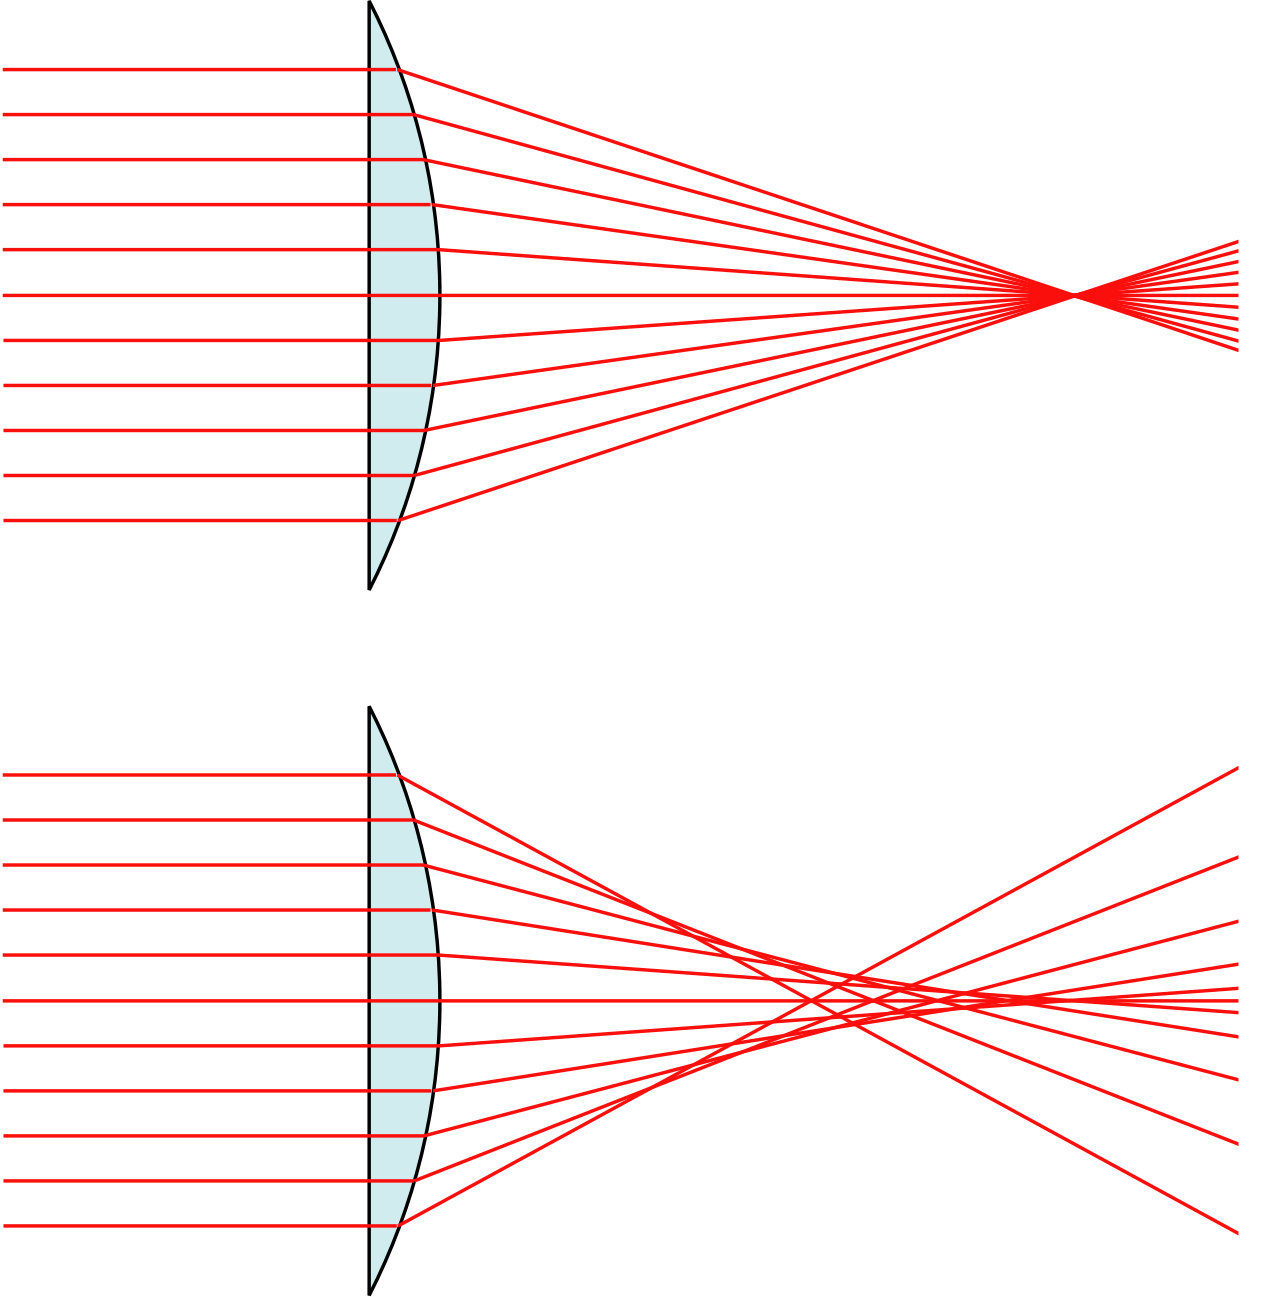


### Eksempel 2

Finn en lineær tilnærming til $\log(x)$. 

Det er ikke så smart å ta $x_0=0$ siden $\log(0)$ er ikke definert. La oss heller prøve med $x_0=1$.

Vi har $f'(x) = \frac{1}{x}$.

Den linære tilnærmingen av $\log(x)$ rundt $x_0 = 1$ blir altså

$$
\log(x) \approx x-1
$$

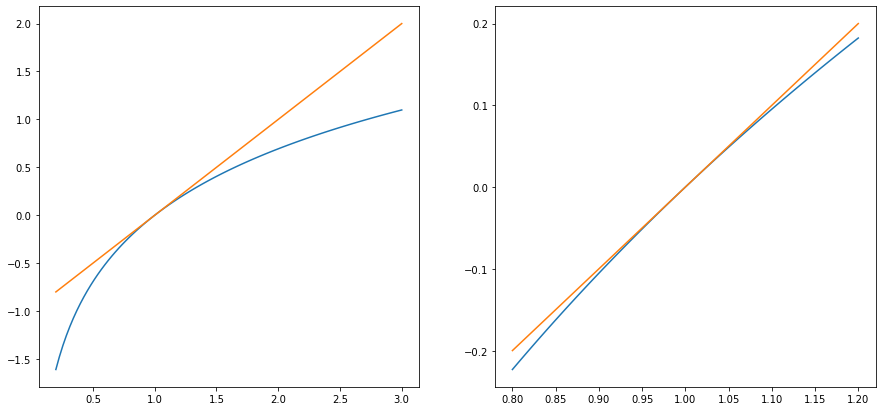

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 100 punkter mellom 0.2 og 3, for grafene til venstre
x = np.linspace(0.2,3,100)

# 100 punkter mellom 0.8 og 1.2, for grafene til høyre
y = np.linspace(0.8,1.2,100)

# log(x) på punktene mellom 0.2 og 3
f = np.log(x)
# log(y) på punktene mellom 0.8 og 1.2
g = np.log(y)

# lager figuren
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

# plottene til venstre, 0.2<x<3
# plotter y=log(x) i blå
ax1.plot(x,f)
# plotter y=x-1 i oransje
ax1.plot(x,x-1)

# plottene til høyre, 0.8<x<1.2
# plotter y=log(x) i blå
ax2.plot(y,g)
# plotter y=x-1 i oransje
ax2.plot(y,y-1)

## 2. Andreordens tilnærming

Vi får bedre nøyaktighet hvis vi heller bruker et parabel. Det kan vises at den beste tilnærming av $f(x)$ med et andreordens polynom blir

$$
f(x) \approx  f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2}f''(x_0) (x-x_0)^2 
$$

### Eksempel 3

La oss fortsette med $\log(x)$. Vi har $f''(x) = -x^{-2}$, slik at $f''(1)=-1$. Vi får altså:

$$
\log(x) \approx (x-1) - \frac{1}{2}(x-1)^2
$$

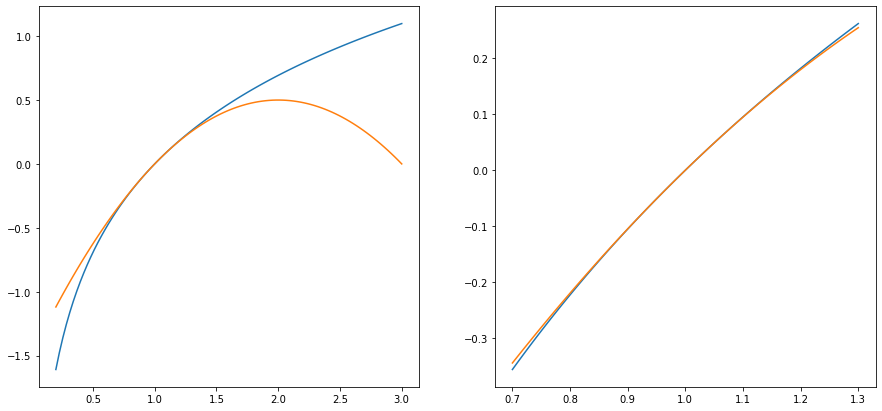

In [8]:
# 100 punkter mellom 0.2 og 3, for grafene til venstre
x = np.linspace(0.2,3,100)
# 100 punkter mellom 0.7 og 1.3, for grafene til høyre
y = np.linspace(0.7,1.3,100)

# log(x) på punktene mellom 0.2 og 3
f = np.log(x)
# log(y) på punktene mellom 0.7 og 1.3
g = np.log(y)

# andreordens taylor tilnærming mellom 0.2 og 3
f2 = (x-1) - 0.5*(x-1)**2
# andreordens taylor tilnærming mellom 0.7 og 1.3
g2 = (y-1) - 0.5*(y-1)**2

# Lag figuren
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

# til venstre, 0.2<x<3
# log(x) i blå,
ax1.plot(x,f)
# andreordens taylor i oransje, 
ax1.plot(x,f2)

# til høyre, 0.7<x<1.3
# log(x) i blå
ax2.plot(y,g)
# andreordens taylor i oransje
ax2.plot(y,g2)

### 3. Generell tilnærming (orden $k$)

Vi kan fortsette med så mange deriverte som vi vil (forutsatt at de eksisterer). Det viser seg at den beste tilnærming er:

$$
\begin{align*}
f(x) \approx & f(x_0) + f'(x_0) (x-x_0) %+ \frac{1}{2}f''(x) (x-x_0)^2 
+ \ldots 
 + \frac{1}{k!} f^{(k)}(x_0) (x-x_0)^k \\
% &+ \frac{1}{(n+1)!} f^{(n+1)}(a) (x-x_0)^{n+1}
\end{align*}
$$

Den kalles for *Taylor utviklingen* av orden $k$.

## Eksempel 4

Regn ut Taylor tilnærming av orden $k$ til $f=\log(x)$, rundt $x_0 = 1$.

Vi har allerede beregnet $f'(x)=x^{-1}$ og $f''(x) = -x^{-2}$. Den tredje deriverte er da $f^{(3)}(x) = 2x^{-3}$, den fjerde er $f^{(4)}(x)=2\cdot -3x^{-4}$, og generelt er $f^{(k)}(x) = (-1)^{k-1} (k-1)! x^{-k}$. Vi har 

$$
\log(x) \approx (x-1) - \frac{1}{2} (x-1)^2 + \ldots + (-1)^{k-1} \frac{(k-1)!}{k!} (x-1)^2
$$

Siden $\frac{(k-1)!}{k!} = \frac{1}{k}$ har vi

$$
\log(x) \approx (x-1) - \frac{1}{2} (x-1)^2 + \ldots + (-1)^{k-1} \frac{1}{k} (x-1)^2
$$

### Eksempel 5

Bruk den tredje ordens Taylor utviklingen rundt $x_0=1$ til å finne an approksimasjon til $\sqrt{1.1}$. 

Vi tar altså $f(x)=\sqrt{x}$, slik at

$$
f'(x) = \frac{1}{2}x^{-\frac{1}{2}}, \quad
f''(x) = -\frac{1}{4}x^{-\frac{3}{2}}, \quad
f^{(3)}(x) = \frac{3}{8}x^{-\frac{5}{2}}
$$

Ved å sette inn $x=1$ får vi
$$
f'(1) = \frac{1}{2}, \quad
f''(1) = -\frac{1}{4}, \quad
f^{(3)}(1) = \frac{3}{8}. 
$$

Siden $f(1) = \sqrt{1} = 1$, får vi

$$
\begin{align*}
f(x+1) &\approx f(1) + \frac{1}{2}x - \frac{1}{4}\frac{1}{2!}x^2 + \frac{3}{8}\frac{1}{3!}x^3 \\
&= 1 + \frac{1}{2}x - \frac{1}{8} x^2 + \frac{1}{16}x^3
\end{align*}
$$

La oss bruke det til å finne en tilnærming til $\sqrt{1.1}$. Vi har:

$$
\sqrt{1.1}=f(0.1 + 1) \approx 1 + \frac{1}{2} 0.1 - \frac{1}{8} 0.01 + \frac{1}{16} 0.001 = 1 + 0.05 - 0.00125 + 0.0000625 = 1.0488125
$$

Den ekte verdien er $\sqrt{1.1} = 1.04880884\ldots$

## Er tilnærmingen bra?

Vi skal undersøke tilnærmingen til logaritmen i øvingen. I den neste seksjonen vil vi vise en presis måte å estimere feilen.